In [2]:

##########################################################
#  Python script template for Question 3 (IAML Level 10)
#  Note that:
#  - You should not change the name of this file, 'iaml01cw2_q3.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from sklearn.mixture import GaussianMixture
from iaml01cw2_helpers import *
from iaml01cw2_my_helpers import *

#<----

C:\Users\Chris\miniconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [3]:
# Load data
Xtrn, Ytrn, Xtst, Ytst = load_CoVoST2("../data")

In [4]:
# Q3.1
def iaml01cw2_q3_1():
    kmeans = KMeans(n_clusters=22, random_state=1).fit(Xtrn)
    
    sum_dists = kmeans.inertia_
    print(sum_dists)
    
    for i in range(22): 
        num_samples = sum(kmeans.labels_ == i)
        print("# of samples in cluster ", i, ": ", num_samples)
        
    return kmeans

iaml01cw2_q3_1()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

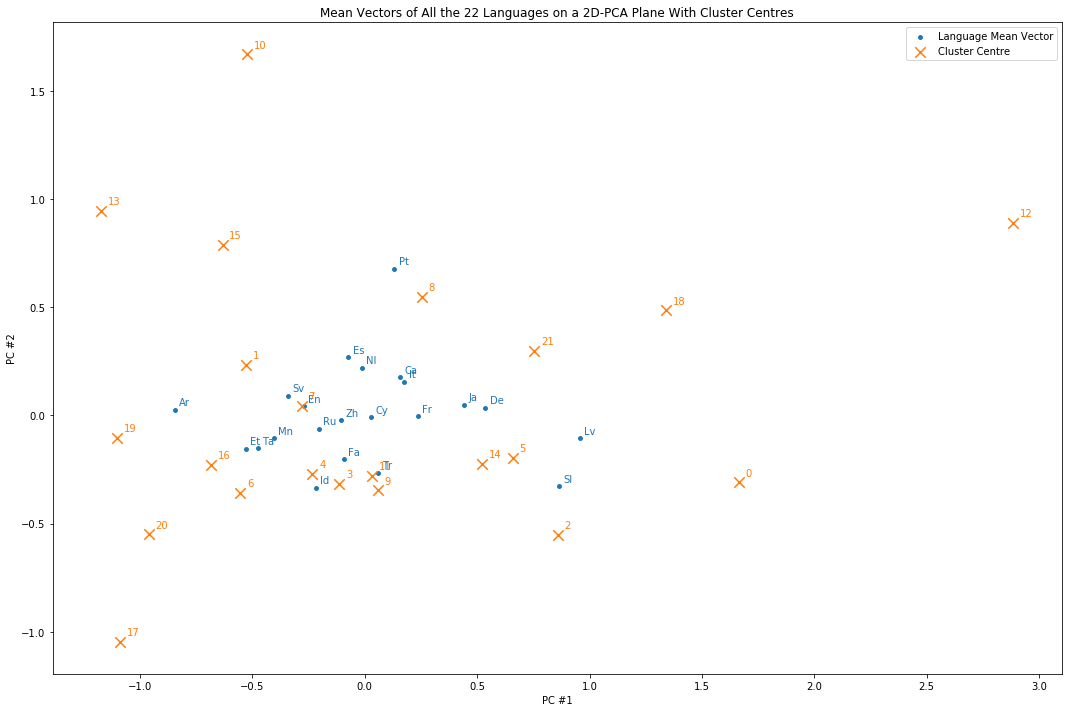

In [11]:
# Q3.2
def iaml01cw2_q3_2():
    # Get all vars from Q3.1 and languages
    kmeans = iaml01cw2_q3_1()
    _, lang_codes = readLangs()
    
    # Get means
    Xmeans = np.zeros((22,26)) 
    for i in range(22):
        Xmeans[i] = Xtrn[Ytrn==i].mean(axis=0)
               
    pca = PCA(n_components=22)
    trn_trans = pca.fit_transform(Xmeans)
    
    centres = kmeans.cluster_centers_
    centres_trans = pca.transform(centres)
    
    plt.figure(figsize=(15,10))
    plt.title("Mean Vectors of All the 22 Languages on a 2D-PCA Plane With Cluster Centres")

    plt.scatter(trn_trans[:,0], trn_trans[:,1], s=15, label="Language Mean Vector")
    plt.scatter(centres_trans[:,0], centres_trans[:,1], marker="x", s=110, label="Cluster Centre")
    
    for i in range(22):        
        plt.text(trn_trans[i,0]+0.02, trn_trans[i,1]+0.02, lang_codes[i], color="tab:blue")        
        plt.text(centres_trans[i,0]+0.03, centres_trans[i,1]+0.03, i, color="tab:orange")     
        
    plt.xlabel("PC #1")
    plt.ylabel("PC #2")
    plt.legend(loc=0)
    plt.tight_layout()
    plt.show()
    
iaml01cw2_q3_2()

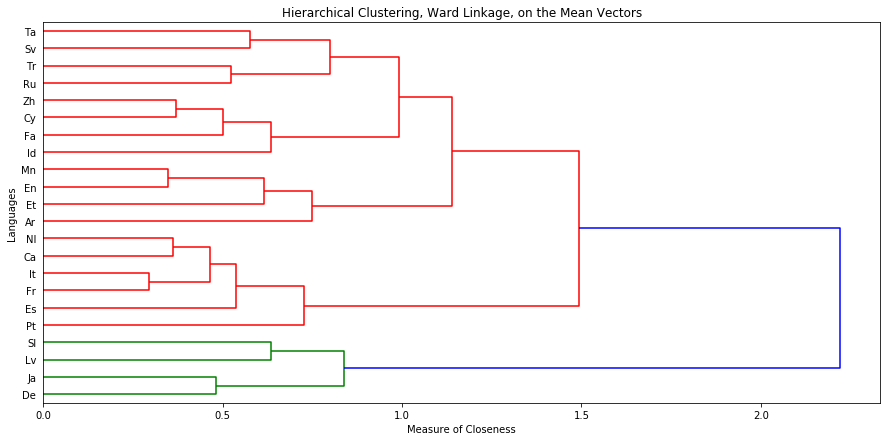

In [18]:
# Q3.3
def iaml01cw2_q3_3():
    # Get languages
    _, lang_codes = readLangs()
    
    # Get means
    Xmeans = np.zeros((22,26)) 
    for i in range(22):
        Xmeans[i] = Xtrn[Ytrn==i].mean(axis=0)

    Z = hierarchy.linkage(Xmeans, 'ward')
    
    plt.figure(figsize=(15,7))
    plt.title("Hierarchical Clustering, Ward Linkage, on the Mean Vectors")
    dn = hierarchy.dendrogram(Z, orientation='right', labels=lang_codes)
    plt.xlabel("Measure of Closeness")
    plt.ylabel("Languages")
    plt.show()
    
iaml01cw2_q3_3()

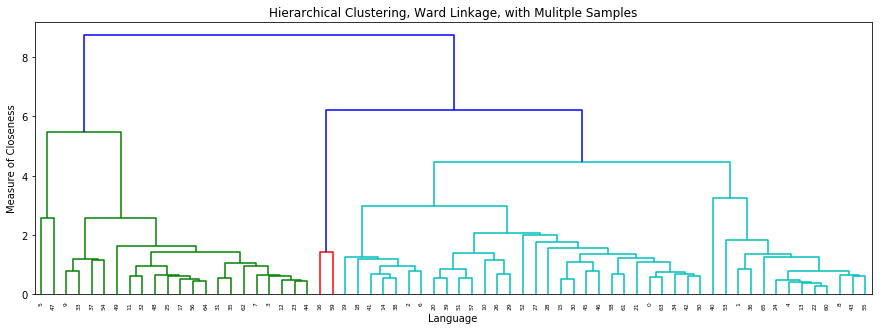

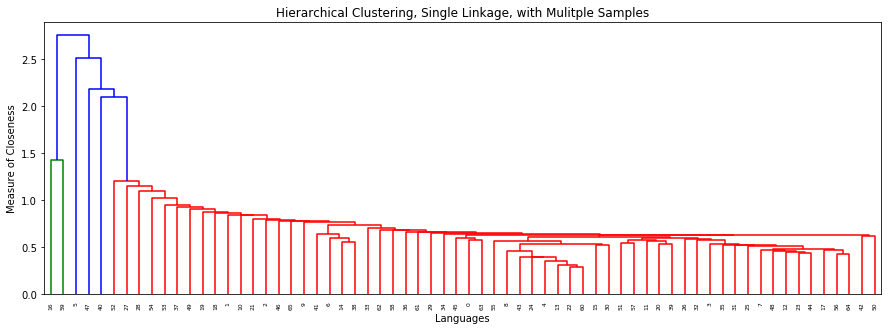

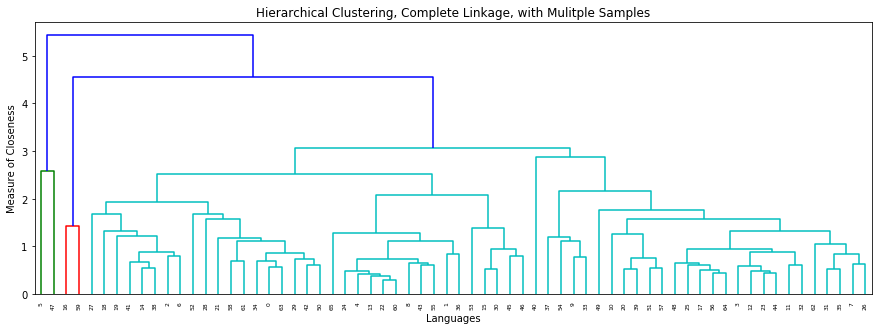

In [19]:
# Q3.4
def iaml01cw2_q3_4():
    # Get languages
    _, lang_codes = readLangs()

    all_kmeans = []
    for i in range(22):
        all_kmeans.append(KMeans(n_clusters=3, random_state=1).fit(Xtrn[Ytrn==i]))
    
    # Get vecs
    vecs = np.zeros((22,3,26))
    for i in range(22):
        for j in range(3):
            vecs[i,j] = all_kmeans[i].cluster_centers_[j]
            
    vecs  = vecs.reshape(66,26)

    Z0 = hierarchy.linkage(vecs, 'ward')
    Z1 = hierarchy.linkage(vecs, 'single')
    Z2 = hierarchy.linkage(vecs, 'complete')
    
    plt.figure(figsize=(15,5))
    
    plt.title("Hierarchical Clustering, Ward Linkage, with Mulitple Samples")
    dn0 = hierarchy.dendrogram(Z0, orientation='top')
    plt.ylabel("Measure of Closeness")
    plt.xlabel("Language")

    plt.show()
    
    plt.figure(figsize=(15,5))
    
    plt.title("Hierarchical Clustering, Single Linkage, with Mulitple Samples")
    dn1 = hierarchy.dendrogram(Z1, orientation='top')
    plt.ylabel("Measure of Closeness")
    plt.xlabel("Languages")

    plt.show()
    
    plt.figure(figsize=(15,5))
    
    plt.title("Hierarchical Clustering, Complete Linkage, with Mulitple Samples")
    dn2 = hierarchy.dendrogram(Z2, orientation='top')
    plt.ylabel("Measure of Closeness")
    plt.xlabel("Languages")

    plt.show()
    
iaml01cw2_q3_4()

K = 1
Training data - Cov type diag , score: 14.280416117561785
Test data data - Cov type diag , score: 13.842923924145325
Training data - Cov type full , score: 16.39360043614829
Test data data - Cov type full , score: 15.810511543142642


K = 3
Training data - Cov type diag , score: 15.398429743214336
Test data data - Cov type diag , score: 15.04074826506394
Training data - Cov type full , score: 18.08600493814516
Test data data - Cov type full , score: 17.066076255632257


K = 5
Training data - Cov type diag , score: 16.010388761796378
Test data data - Cov type diag , score: 15.90854610007615
Training data - Cov type full , score: 19.03572395191873
Test data data - Cov type full , score: 16.489426463741562


K = 10
Training data - Cov type diag , score: 16.916504763220765
Test data data - Cov type diag , score: 16.567565210557202
Training data - Cov type full , score: 21.062020341621178
Test data data - Cov type full , score: 14.621763240167146


K = 15
Training data - Cov type diag

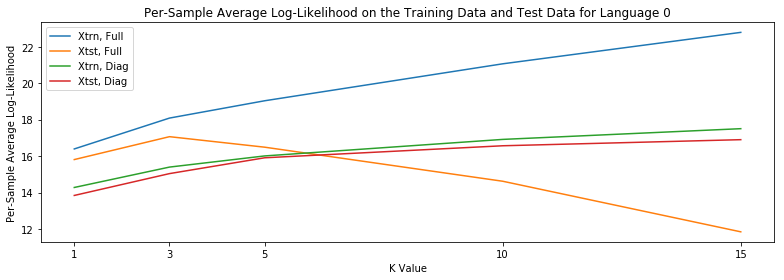

In [24]:
def iaml01cw2_q3_5():
    Ks = [1,3,5,10,15]
    Covs = ['diag', 'full']
    Xtrn0 = Xtrn[Ytrn==0]
    Xtst0 = Xtst[Ytst==0]
    scores_Xtrn_diag = []
    scores_Xtst_diag = []
    scores_Xtrn_full = []
    scores_Xtst_full = []
    
    for k in Ks:
        # Print results
        print("K =", k)
        for j in Covs:
            gmm = GaussianMixture(n_components=k, covariance_type=j, random_state=1).fit(Xtrn0)
            score_Xtrn = gmm.score(Xtrn[Ytrn==0])
            score_Xtst = gmm.score(Xtst[Ytst==0])
            print("Training data - Cov type", j, ", score:", score_Xtrn)
            print("Test data data - Cov type", j, ", score:", score_Xtst)
        print("\n")

        # Diag
        gmm_diag = GaussianMixture(n_components=k, covariance_type='diag', random_state=1).fit(Xtrn0)
        scores_Xtrn_diag.append(gmm_diag.score(Xtrn0))
        scores_Xtst_diag.append(gmm_diag.score(Xtst0))
        
        # Full
        gmm_full = GaussianMixture(n_components=k, covariance_type='full', random_state=1).fit(Xtrn0)
        scores_Xtrn_full.append(gmm_full.score(Xtrn0))
        scores_Xtst_full.append(gmm_full.score(Xtst0))
    
    # Plot
    plt.figure(figsize=(11,4))
    plt.title("Per-Sample Average Log-Likelihood on the Training Data and Test Data for Language 0")
    
    plt.plot(Ks, scores_Xtrn_full, label="Xtrn, Full")
    plt.plot(Ks, scores_Xtst_full, label="Xtst, Full")
    plt.plot(Ks, scores_Xtrn_diag, label="Xtrn, Diag")
    plt.plot(Ks, scores_Xtst_diag, label="Xtst, Diag")
    
    plt.ylabel("Per-Sample Average Log-Likelihood")
    plt.xlabel("K Value")
    plt.xticks(Ks)
    plt.tight_layout()
    plt.legend()
    plt.show()  
    
iaml01cw2_q3_5()